In [1]:
pip install tenseal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 23.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tenseal as ts
import pandas as pd


In [4]:
import boto3
import pandas as pd
from io import StringIO

In [5]:
s3 = boto3.client('s3')

In [6]:
bucket_name = 'spambuck'
file_key = 'Data/adjusted_dataset.csv'

In [7]:
obj = s3.get_object(Bucket=bucket_name, Key=file_key)

In [8]:
data = obj['Body'].read().decode('utf-8')

In [9]:
df = pd.read_csv(StringIO(data))

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,11.697057,14.483599,72.129332,426.011099,0.118243,0.118116,0.006629,0.018170,0.250096,...,13.571259,18.560693,77.745435,383.697754,0.128335,0.173653,0.000547,0.045619,0.316806,0.075902
1,B,12.925950,14.721407,79.051244,407.364412,0.081711,0.077401,0.069718,0.025247,0.158556,...,14.062841,19.143985,79.343627,481.118254,0.101434,0.231639,0.280007,0.094843,0.268735,0.087703
2,B,11.234850,15.703946,75.790831,416.968242,0.082851,0.108666,0.109764,0.025877,0.181086,...,12.363207,19.649092,78.970601,398.148224,0.108495,0.321416,0.316496,0.067500,0.210004,0.103175
3,B,11.899678,18.069850,70.057362,377.243837,0.089120,0.071020,0.036224,0.013575,0.143849,...,12.686495,21.569586,75.223550,495.460059,0.115212,0.157781,0.151731,0.048225,0.232045,0.080050
4,B,12.496645,13.530974,85.373247,535.888325,0.112673,0.079794,0.035136,0.032776,0.158130,...,13.326553,21.467030,88.677834,595.883038,0.153899,0.214269,0.138912,0.118326,0.245055,0.084338


In [11]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Preproccesing 

In [12]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.697057,14.483599,72.129332,426.011099,0.118243,0.118116,0.006629,0.018170,0.250096,0.065601,...,13.571259,18.560693,77.745435,383.697754,0.128335,0.173653,0.000547,0.045619,0.316806,0.075902
1,12.925950,14.721407,79.051244,407.364412,0.081711,0.077401,0.069718,0.025247,0.158556,0.061466,...,14.062841,19.143985,79.343627,481.118254,0.101434,0.231639,0.280007,0.094843,0.268735,0.087703
2,11.234850,15.703946,75.790831,416.968242,0.082851,0.108666,0.109764,0.025877,0.181086,0.072915,...,12.363207,19.649092,78.970601,398.148224,0.108495,0.321416,0.316496,0.067500,0.210004,0.103175
3,11.899678,18.069850,70.057362,377.243837,0.089120,0.071020,0.036224,0.013575,0.143849,0.062828,...,12.686495,21.569586,75.223550,495.460059,0.115212,0.157781,0.151731,0.048225,0.232045,0.080050
4,12.496645,13.530974,85.373247,535.888325,0.112673,0.079794,0.035136,0.032776,0.158130,0.065236,...,13.326553,21.467030,88.677834,595.883038,0.153899,0.214269,0.138912,0.118326,0.245055,0.084338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,20.113476,14.826232,134.818362,1322.132295,0.100629,0.134729,0.194343,0.098813,0.182235,0.058501,...,23.223527,16.556072,153.892417,1537.669076,0.134050,0.216903,0.406582,0.172666,0.233856,0.075261
13054,12.837975,18.643042,82.746941,542.466321,0.080379,0.025617,-0.006596,0.008511,0.179544,0.055670,...,13.445018,21.257089,88.720117,542.629238,0.100317,0.065686,-0.016882,0.006078,0.241289,0.064365
13055,14.466384,14.917767,96.656265,669.560126,0.100190,0.104127,0.076016,0.055037,0.173668,0.059766,...,16.002627,20.012391,112.121264,774.170256,0.129141,0.259043,0.329072,0.161925,0.266702,0.076641
13056,13.050836,16.050685,88.966721,538.329085,0.107043,0.128754,0.060065,0.026127,0.196521,0.068298,...,14.705934,21.002355,95.287923,680.187611,0.131239,0.288438,0.218313,0.071200,0.316555,0.080212


In [13]:
y

0        B
1        B
2        B
3        B
4        B
        ..
13053    M
13054    B
13055    B
13056    B
13057    B
Name: diagnosis, Length: 13058, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
y_encoded = le.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

# NOISE ADDITION 

In [16]:
def laplace_mechanism(data, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return data + noise

In [17]:
noised_X = laplace_mechanism(X,1,0.5)

In [18]:
noised_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.382996,14.169537,71.815271,425.697038,-0.195818,-0.195945,-0.307432,-0.295892,-0.063966,-0.248461,...,13.257198,18.246631,77.431374,383.383693,-0.185726,-0.140408,-0.313514,-0.268442,0.002745,-0.238159
1,12.611889,14.407346,78.737183,407.050351,-0.232351,-0.236661,-0.244343,-0.288814,-0.155505,-0.252596,...,13.748779,18.829924,79.029565,480.804193,-0.212627,-0.082422,-0.034054,-0.219218,-0.045326,-0.226358
2,10.920789,15.389885,75.476769,416.654181,-0.231210,-0.205395,-0.204297,-0.288184,-0.132975,-0.241146,...,12.049146,19.335030,78.656540,397.834162,-0.205566,0.007355,0.002434,-0.246561,-0.104057,-0.210886
3,11.585617,17.755788,69.743301,376.929776,-0.224942,-0.243041,-0.277837,-0.300486,-0.170213,-0.251233,...,12.372434,21.255525,74.909488,495.145998,-0.198850,-0.156281,-0.162330,-0.265837,-0.082016,-0.234011
4,12.182584,13.216913,85.059186,535.574264,-0.201388,-0.234267,-0.278925,-0.281285,-0.155931,-0.248825,...,13.012492,21.152968,88.363772,595.568977,-0.160162,-0.099792,-0.175150,-0.195735,-0.069007,-0.229723


# PCA

In [19]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 11)
reduced_X  = pca.fit_transform(noised_X)

In [20]:
reduced_X.shape

(13058, 11)

# Data Spliting For clients

In [21]:
def split_data_for_clients(a, b, n_clients=3):
    client_data = []
    for i in range(n_clients):
        X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42+i)
        client_data.append((X_train, X_test, y_train, y_test))
    return client_data

client_data = split_data_for_clients(reduced_X, y_encoded)

In [22]:
def print_client_samples(client_data):
    for i, (X_train, X_test, y_train, y_test) in enumerate(client_data):
        print(f"Client {i+1} Data Sample:")
        
        print("Training Features Sample:")
        print(X_train[:5])  # Print the first 5 samples of training features
        print("Training Labels Sample:")
        print(y_train[:5])  # Print the first 5 samples of training labels
        
        print("Test Features Sample:")
        print(X_test[:5])   # Print the first 5 samples of test features
        print("Test Labels Sample:")
        print(y_test[:5])   # Print the first 5 samples of test labels
        
        print("\n")

# Assuming client_data is already defined
print_client_samples(client_data)


Client 1 Data Sample:
Training Features Sample:
[[-3.20866296e+02 -7.05945472e+01  1.22358746e+00 -2.36117616e+00
   7.15190485e+00  7.81557182e+00 -1.50808114e+00  1.02298175e+00
  -3.69910891e-01 -5.04582296e-01 -3.03020221e-01]
 [-5.80434825e+02 -5.86236485e+01  1.77471291e+01  9.13122282e+00
   1.32853135e-01 -1.63569643e+00 -8.97999361e-01  9.48592379e-01
  -4.23854252e-01  6.92946906e-01  3.24135277e-02]
 [-5.33144307e+02 -8.28682441e+01  1.10077595e+01  1.04391482e+01
  -7.33000221e-01 -3.15268596e+00 -1.24273562e+00  5.74249850e-01
  -8.34922736e-02 -1.30450497e-01  2.14861381e-01]
 [-3.66450546e+01 -1.07026325e+02  1.21862748e+01  1.52445242e+01
  -2.93964399e+00 -1.67531559e-01  4.23071599e-01 -1.62857866e-01
  -5.22574520e-01  1.50290604e-01  3.72710358e-01]
 [-3.52589176e+02  4.53339584e+01 -1.12513895e+01  1.67499949e+00
  -2.71024212e+00 -6.49420221e-03 -1.57430467e+00 -6.42252461e-01
   2.89624210e-01 -6.79712994e-01  9.80431810e-02]]
Training Labels Sample:
[0 0 0 1 0]


In [23]:
import tenseal as ts
print(ts.__version__)

0.3.14


# Homomorphic Using CKKS scheme

In [24]:
def setup_ckks():
    
    poly_mod_degree = 8192
    coeff_mod_bit_sizes = [60, 40, 40, 60]
    ctx = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=poly_mod_degree,
        coeff_mod_bit_sizes=coeff_mod_bit_sizes
    )
    
    
    ctx.global_scale = 2**40
    
    
    ctx.generate_galois_keys()
    
    return ctx

try:
    ckks_context = setup_ckks()
    print("CKKS context created successfully")
except Exception as e:
    print(f"Error creating CKKS context: {e}")
    print("Available attributes in ts:")
    print(dir(ts))

CKKS context created successfully


# Define necessary functions like client-side training,encrypting, decrypting,aggregating and final federated loop

In [25]:
def client_training(client_id, X_train, y_train):
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    return model.coef_, model.intercept_

In [26]:
def encrypt_weights(weights, intercept, context):
    weights_flat = weights.flatten()
    params = np.concatenate([weights_flat, intercept])  
    encrypted_params = ts.ckks_vector(context, params)
    return encrypted_params


In [27]:
def decrypt_weights(encrypted_params, context, n_features):
    
    decrypted_params = encrypted_params.decrypt()
    
    weights = np.array(decrypted_params[:-1]).reshape(1, n_features) 
    intercept = decrypted_params[-1]
    
    return weights, intercept


In [28]:
def encrypt_intercept(intercept, context):
    return ts.ckks_vector(context, intercept)

In [29]:
def decrypt_intercept(encrypted_intercept, context):
    decrypted_intercept = encrypted_intercept.decrypt()
    return np.array(decrypted_intercept)

In [30]:
def aggregate_encrypted_weights(encrypted_weights):
    # Sum up the encrypted weights
    aggregated_encrypted_weights = encrypted_weights[0]
    for ew in encrypted_weights[1:]:
        aggregated_encrypted_weights += ew
    return aggregated_encrypted_weights


In [31]:
def aggregate_encrypted_intercepts(encrypted_intercepts):
    # Sum up the encrypted intercepts
    aggregated_encrypted_intercepts = encrypted_intercepts[0]
    for ei in encrypted_intercepts[1:]:
        aggregated_encrypted_intercepts += ei
    return aggregated_encrypted_intercepts


# Main FL Loop

In [33]:
def federated_learning(client_data, n_rounds=5):
    prev_weights = None
    n_clients = len(client_data)

    for round_num in range(n_rounds):
        print(f"Round {round_num + 1}")
        
        encrypted_weights = []
        encrypted_intercepts = []
        
        # Client-side training and encryption
        for i, client_tuple in enumerate(client_data):
            if len(client_tuple) == 4:
                X_train, X_test, y_train, y_test = client_tuple
            elif len(client_tuple) == 5:
                X_train, X_test, y_train, y_test, _ = client_tuple
            else:
                raise ValueError(f"Unexpected client data format for client {i}")

            weights, intercept = client_training(i, X_train, y_train)
            enc_params = encrypt_weights(weights, intercept, ckks_context)
            encrypted_weights.append(enc_params)
            enc_intercept = encrypt_intercept(intercept, ckks_context)
            encrypted_intercepts.append(enc_intercept)
        
        # Aggregate encrypted weights and intercepts
        aggregated_encrypted_weights = aggregate_encrypted_weights(encrypted_weights)
        aggregated_encrypted_intercepts = aggregate_encrypted_intercepts(encrypted_intercepts)
        
        # Simulate sending aggregated encrypted results back to clients
        client_decrypted_weights = []
        client_decrypted_intercepts = []
        
        for i, client_tuple in enumerate(client_data):
            if len(client_tuple) == 4:
                X_train, X_test, y_train, y_test = client_tuple
            elif len(client_tuple) == 5:
                X_train, X_test, y_train, y_test, _ = client_tuple
            else:
                raise ValueError(f"Unexpected client data format for client {i}")

            # Each client decrypts the aggregated parameters locally
            decrypted_weights, _ = decrypt_weights(
                aggregated_encrypted_weights,
                ckks_context,
                X_train.shape[1]  # Number of features for this client
            )
            decrypted_intercept = decrypt_intercept(
                aggregated_encrypted_intercepts,
                ckks_context
            )
            
            # Divide by number of clients to get the average
            decrypted_weights /= n_clients
            decrypted_intercept /= n_clients
            
            client_decrypted_weights.append(decrypted_weights)
            client_decrypted_intercepts.append(decrypted_intercept)
        
        # Update client models with their locally decrypted parameters
        updated_client_data = []
        for i, client_tuple in enumerate(client_data):
            if len(client_tuple) == 4:
                X_train, X_test, y_train, y_test = client_tuple
            elif len(client_tuple) == 5:
                X_train, X_test, y_train, y_test, _ = client_tuple
            else:
                raise ValueError(f"Unexpected client data format for client {i}")

            model = LogisticRegression()
            model.coef_ = client_decrypted_weights[i]
            model.intercept_ = client_decrypted_intercepts[i]
            updated_client_data.append((X_train, X_test, y_train, y_test, model))
        
        client_data = updated_client_data
        
        # Check for convergence (using the first client's weights as reference)
        if round_num > 0:
            weight_diff = np.sum(np.abs(client_decrypted_weights[0] - prev_weights))
            if weight_diff < 1e-5:
                print(f"Converged after {round_num + 1} rounds")
                return client_decrypted_weights[0], client_decrypted_intercepts[0]
        
        prev_weights = client_decrypted_weights[0]

    # Return the parameters of the first client as the final result
    return client_decrypted_weights[0], client_decrypted_intercepts[0]

# Example usage
final_aggregated_weights, final_aggregated_intercept = federated_learning(client_data)
print("Final Aggregated Weights:", final_aggregated_weights)
print("Final Aggregated Intercept:", final_aggregated_intercept)

Round 1
Round 2
Converged after 2 rounds
Final Aggregated Weights: [[ 0.01467698 -0.0120466   0.05863056  0.27528518  0.13699708 -0.07093463
  -0.45073442 -0.30220495  0.12858322 -1.84961779 -2.74789785]]
Final Aggregated Intercept: [0.7891345]


In [34]:
weights_list = final_aggregated_weights.tolist()
intercept_list = final_aggregated_intercept.tolist()

In [35]:
with open('aggregated_parameters.txt', 'w') as f:
    f.write("Final Aggregated Weights:\n")
    for weights in weights_list:
        f.write(f"{weights}\n")
    f.write("Final Aggregated Intercept:\n")
    for intercept in intercept_list:
        f.write(f"{intercept}\n")

In [36]:
print("Aggregated parameters saved to 'aggregated_parameters.txt'")

Aggregated parameters saved to 'aggregated_parameters.txt'


In [37]:
from IPython.display import FileLink

display(FileLink('aggregated_parameters.txt'))

/home/ec2-user/SageMaker/aggregated_parameters.txt

# Evaluation

In [38]:
X_train,X_test,y_train,y_test = train_test_split(reduced_X, y_encoded,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# fxn to evaluate mode;
def evaluate_model(X_test, y_test, weights, intercept):

    model = LogisticRegression(max_iter=1000, fit_intercept=True)
    
    model.fit(X_test, y_test)

    model.coef_ = np.array(weights).reshape(1, -1)
    model.intercept_ = np.array(intercept).reshape(-1)
    
    # Prediction on test
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Evaluate the model
accuracy, report = evaluate_model(X_test, y_test, final_aggregated_weights, final_aggregated_intercept)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9563552833078101
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1562
           1       0.95      0.94      0.95      1050

    accuracy                           0.96      2612
   macro avg       0.96      0.95      0.95      2612
weighted avg       0.96      0.96      0.96      2612



In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'C': [ 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}


In [42]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [43]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy found:  0.9517509945186896


In [44]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9559724349157733
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1562
           1       0.95      0.94      0.94      1050

    accuracy                           0.96      2612
   macro avg       0.96      0.95      0.95      2612
weighted avg       0.96      0.96      0.96      2612



In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [131]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

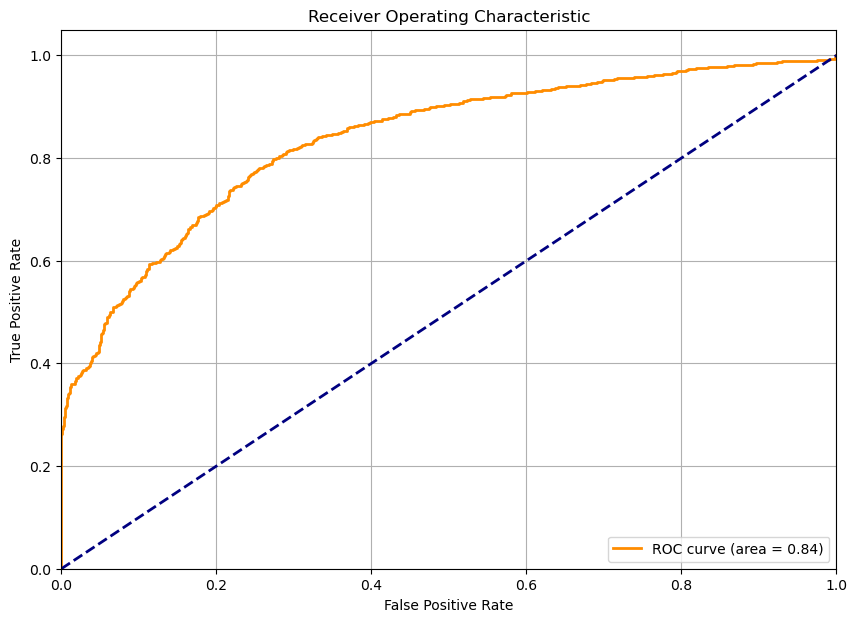

In [132]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)

In [133]:
plt.savefig('roc_curve.png')
plt.close()

In [134]:
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

Area Under the Curve (AUC): 0.84


In [75]:
with open('auc_report.txt', 'w') as f:
    f.write(f'Area Under the Curve (AUC): {roc_auc:.2f}\n')